In [5]:
# Importing required libraries for data manipulation, preprocessing, and machine learning tasks
import pandas as pd  # For handling and manipulating datasets (e.g., loading, processing)
import numpy as np  # For numerical computations and working with arrays

# Importing functions for splitting datasets into training and testing sets
from sklearn.model_selection import train_test_split

# Importing preprocessing tools
from sklearn.preprocessing import StandardScaler  # For feature scaling (standardizing numerical data)
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables into numerical format

# Importing the Random Forest Classifier model from scikit-learn
from sklearn.ensemble import RandomForestClassifier  # A machine learning algorithm for classification tasks

# Importing metrics to evaluate the performance of the classification model
from sklearn.metrics import classification_report  # To generate a detailed report on precision, recall, F1-score, etc.
from sklearn.metrics import confusion_matrix  # To compute the confusion matrix for evaluating true vs predicted classes
from sklearn.metrics import accuracy_score  # To calculate the overall accuracy of the model

In [6]:
# Loading the dataset from a CSV file using pandas
shopping_dataset = pd.read_csv('online_shoppers_intention.csv')

Shopping_dataset = shopping_dataset

In [7]:
# Define mappings
region_map = {
    1: "USA",
    2: "Canada",
    3: "Europe",
    4: "India",
    5: "China",
    6: "Brazil",
    7: "Australia",
    8: "Japan",
    9: "South Africa"
}

special_day_map = {
    0: "New Year's Day",
    0.2: "Valentine's Day",
    0.4: "Easter",
    0.6: "Independence Day",
    0.8: "Halloween",
    1: "Thanksgiving",
    
}

browser_map = {
    1: "Chrome",
    2: "Firefox",
    3: "Safari",
    4: "Edge",
    5: "Opera",
    6: "Internet Explorer",
    7: "Brave",
    8: "Vivaldi",
    9: "Samsung Internet",
    10: "DuckDuckGo Browser",
    11: "UC Browser",
    12: "QQ Browser",
    13: "Yandex Browser"
}

# Apply mappings to the columns
shopping_dataset['Region'] = shopping_dataset['Region'].map(region_map)
shopping_dataset['SpecialDay'] = shopping_dataset['SpecialDay'].map(special_day_map)
shopping_dataset['Browser'] = shopping_dataset['Browser'].map(browser_map)

# Display the first few rows to verify changes
shopping_dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,New Year's Day,Feb,1,Chrome,USA,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,New Year's Day,Feb,2,Firefox,USA,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,New Year's Day,Feb,4,Chrome,South Africa,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,New Year's Day,Feb,3,Firefox,Canada,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,New Year's Day,Feb,3,Safari,USA,4,Returning_Visitor,True,False


In [8]:
"""
Column Descriptions:

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

"""

"\nColumn Descriptions:\n\nAdministrative: This is the number of pages of this type (administrative) that the user visited.\n\nAdministrative_Duration: This is the amount of time spent in this category of pages.\n\nInformational: This is the number of pages of this type (informational) that the user visited.\n\nInformational_Duration: This is the amount of time spent in this category of pages.\n\nProductRelated: This is the number of pages of this type (product related) that the user visited.\n\nProductRelated_Duration: This is the amount of time spent in this category of pages.\n\nBounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.\n\nExitRates: The percentage of pageviews on the website that end at that specific page.\n\nPageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.\nMore information about how this is calculated\n\nSpe

In [9]:
# Displaying a summary of the dataset
# This includes information such as:
# - The total number of rows (entries) and columns (features)
# - Data types of each column (e.g., int64, float64, object)
# - Non-null count for each column (to check for missing values)
shopping_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  object 
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [10]:
print(u'- Number of rows: {}'.format(shopping_dataset.shape[0]))
print(u'- Number of columns: {}'.format(shopping_dataset.shape[1]))
print(u'- Name of independent variables: {}'.format(list(shopping_dataset.columns[:-1])))
print(u'- Name of target: {}'.format(list(shopping_dataset.columns[-1:])))
print(u'- Dataset shape:{}'.format(shopping_dataset.shape))

- Number of rows: 12330
- Number of columns: 18
- Name of independent variables: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
- Name of target: ['Revenue']
- Dataset shape:(12330, 18)


In [11]:
#checking for null values 

shopping_dataset.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [12]:
# Generating descriptive statistics for the numerical columns in the dataset
# This includes:
# - Count: Number of non-null values in each column
# - Mean: Average value of the column
# - Std: Standard deviation, showing the spread of data
# - Min and Max: Minimum and maximum values in the column
# - 25%, 50%, 75%: Percentile values (also known as quartiles)
shopping_dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,OperatingSystems,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,2.124006,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.911325,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,2.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,2.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,3.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,8.000000,20.000000


In [13]:
# Checking the number of unique values in each column (feature) of the dataset
# `nunique(axis=0)` computes the count of distinct (unique) values for each column
uniques = shopping_dataset.nunique(axis=0)

# Printing the result to display the number of unique values for each column
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


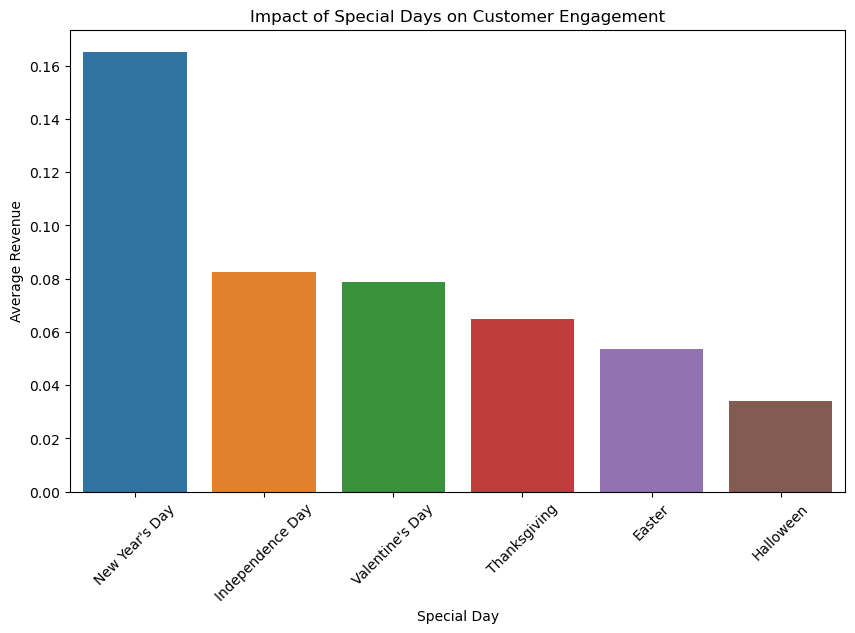

Special Days with the Highest Impact on Customer Engagement:
- New Year's Day: 0.16526762343171766
- Independence Day: 0.08262108262108261
- Valentine's Day: 0.07865168539325842


In [14]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# Step 1: Analyze the impact of special days on customer engagement
# Grouping the dataset by the 'SpecialDay' column and calculating the average revenue
# Replace 'Revenue' with the appropriate metric if analyzing something other than revenue
special_day_analysis = shopping_dataset.groupby('SpecialDay')['Revenue'].mean()

# Sorting the analysis results in descending order based on the calculated average revenue
special_day_analysis = special_day_analysis.sort_values(ascending=False)

# Step 2: Visualize the results using a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size to make the plot more readable
sns.barplot(x=special_day_analysis.index, y=special_day_analysis.values)  # Create a bar plot
plt.title("Impact of Special Days on Customer Engagement")  # Add a title to the plot
plt.xlabel("Special Day")  # Label the x-axis
plt.ylabel("Average Revenue")  # Label the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

# Step 3: Identify and display the top special days with the highest impact
# Extracting the top 3 special days (adjust the number if needed)
top_special_days = special_day_analysis.head(3)

# Print the top special days and their impact values
print("Special Days with the Highest Impact on Customer Engagement:")
for day, impact in top_special_days.items():
    print(f"- {day}: {impact}")

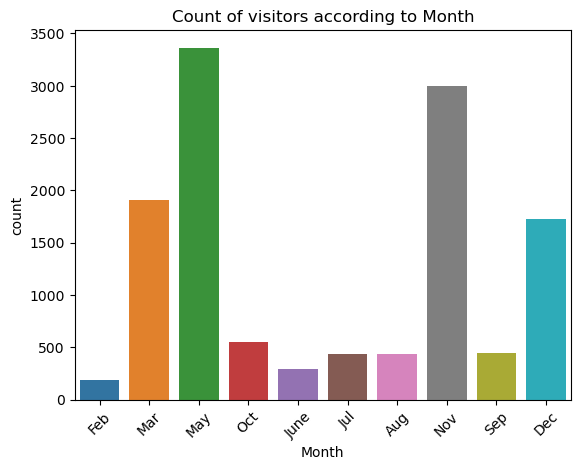

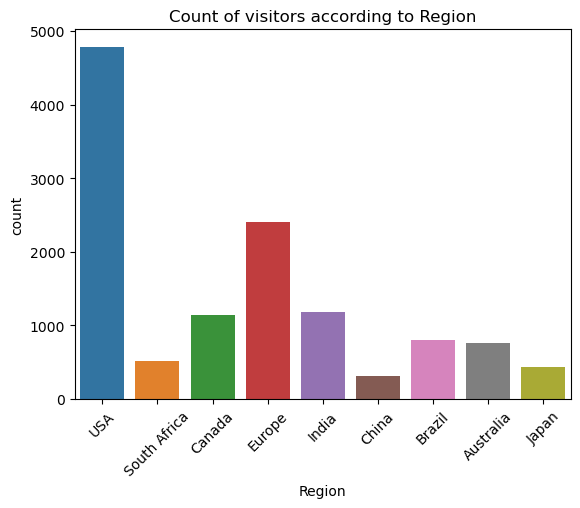

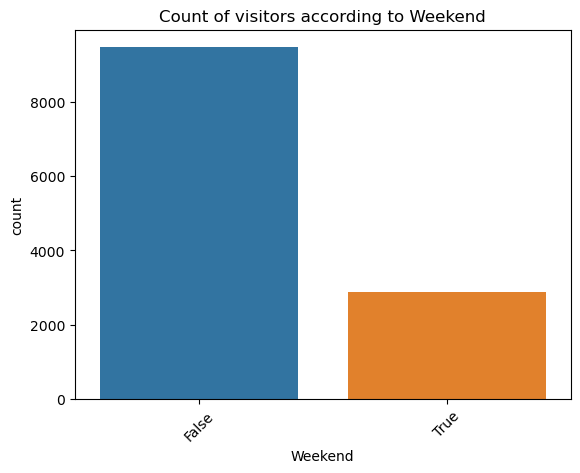

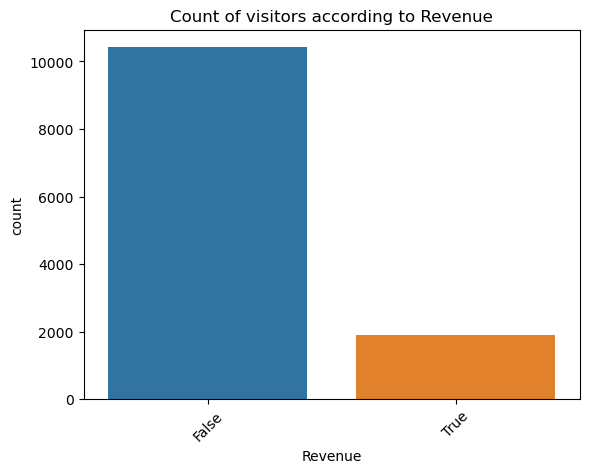

In [15]:
# Loop through the specified columns and create a count plot for each
# The loop will iterate over the list of column names: 'Month', 'Region', 'Weekend', and 'Revenue'
for i in ['Month', 'Region', 'Weekend', 'Revenue']:
    # Created a count plot for the column 'i' using seaborn
    sns.countplot(data=shopping_dataset, x=i)
    
    # Added a title to the plot indicating what is being visualized
    plt.title(f'Count of visitors according to {i}')
    
    # Rotated the x-axis labels for better readability (useful for categorical columns with many unique values)
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()

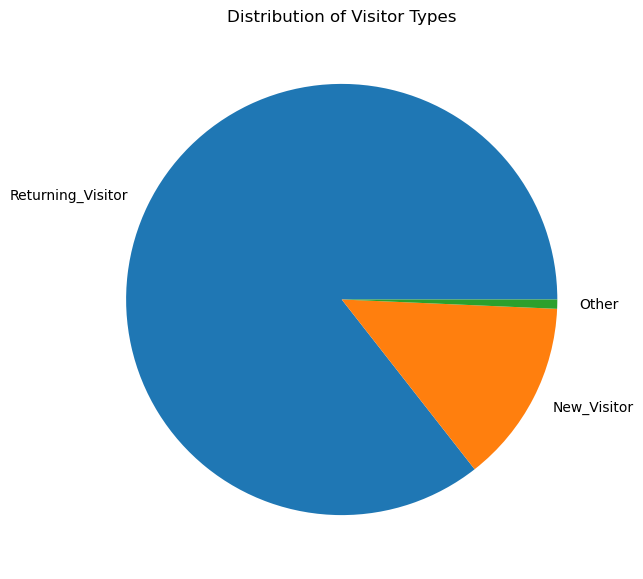

In [16]:
# Creating a pie chart to visualize the distribution of visitor types
# `value_counts()` computes the count of each unique value in the 'VisitorType' column
# `.plot.pie()` generates a pie chart using these counts

shopping_dataset.VisitorType.value_counts().plot.pie(
    y='VisitorType',  # Column to visualize 
    figsize=(7, 7)  # Setting the size of the figure to make it visually balanced
)

# Show the plot
plt.title("Distribution of Visitor Types")  # Added a title to the chart
plt.ylabel('')  # Removed the y-axis label for a cleaner pie chart
plt.show()

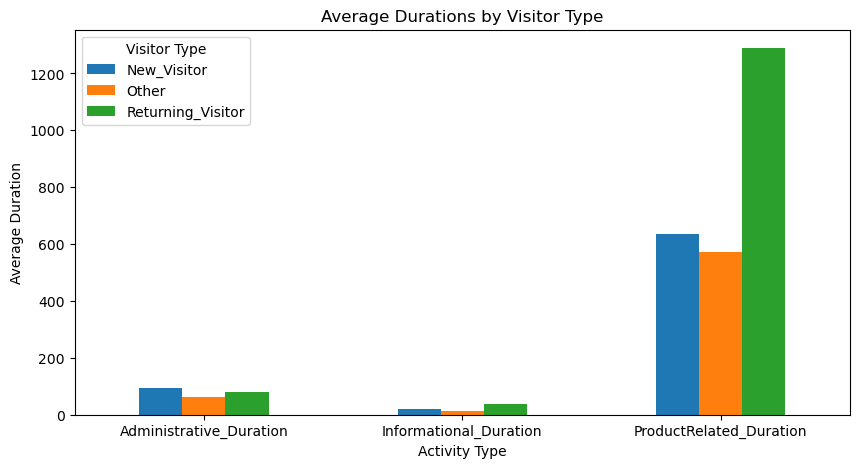

In [17]:
# Selecting relevant columns to analyze durations by visitor type
# The selected columns include durations for administrative, product-related, and informational activities, 
# along with the visitor type.
admin_dpt = shopping_dataset[['Administrative_Duration', 'ProductRelated_Duration', 'Informational_Duration', 'VisitorType']]

# Creating a pivot table to calculate the mean duration for each activity grouped by visitor type
# `values`: Specifies the columns to aggregate ('Administrative_Duration', 'ProductRelated_Duration', 'Informational_Duration')
# `columns`: Specifies the column by which to group the data ('VisitorType')
# `aggfunc='mean'`: Aggregates the data using the mean function
pivot_data = pd.pivot_table(
    admin_dpt,
    values=['Administrative_Duration', 'ProductRelated_Duration', 'Informational_Duration'],
    columns=['VisitorType'],
    aggfunc='mean'
)

# Plotting the pivot table as a bar chart
# `kind='bar'`: Specifies that the chart should be a bar chart
# `figsize=(10, 5)`: Sets the figure size for better visualization
pivot_data.plot(kind='bar', figsize=(10, 5))

# Display the plot
plt.title("Average Durations by Visitor Type")  # Adding a title for context
plt.xlabel("Activity Type")  # Labeling the x-axis
plt.ylabel("Average Duration")  # Labeling the y-axis
plt.xticks(rotation=0)  # Ensuring x-axis labels are horizontal for readability
plt.legend(title="Visitor Type")  # Adding a legend with a title
plt.show()

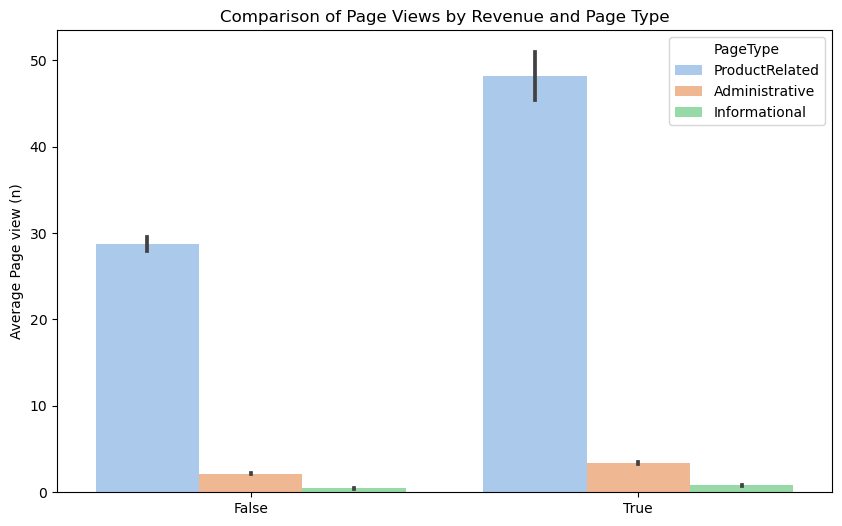

In [18]:
# Transforming the dataset to a long format to facilitate grouped plotting
# `id_vars='Revenue'`: Keeps the 'Revenue' column as is (not melted)
# `value_vars=[ 'ProductRelated', 'Administrative', 'Informational']`: Columns to be melted into a single column
# `var_name='PageType'`: Name of the new column that will store the original column names ('PageType')
# `value_name='Value'`: Name of the new column that will store the values from the melted columns ('Value')
melted_df = shopping_dataset.melt(
    id_vars='Revenue', 
    value_vars=['ProductRelated', 'Administrative', 'Informational'],
    var_name='PageType', 
    value_name='Value'
)

# Setting up the figure for the bar plot
plt.figure(figsize=(10, 6))

# Creating a bar plot to compare page views based on revenue and page type
# `x='Revenue'`: Revenue categories (e.g., 0 or 1) will be on the x-axis
# `y='Value'`: The numerical values (e.g., page views) will be on the y-axis
# `hue='PageType'`: Adds a separate color for each page type (ProductRelated, Administrative, Informational)
# `palette='pastel'`: Sets the color palette to pastel shades
sns.barplot(data=melted_df, x='Revenue', y='Value', hue='PageType', palette='pastel')

# Customizing the plot
plt.xlabel('')  # Remove x-axis label for a cleaner look
plt.ylabel('Average Page view (n)')  # Label the y-axis to indicate the average page views
plt.title('Comparison of Page Views by Revenue and Page Type')  # Add a title for context

# Display the plot
plt.show()

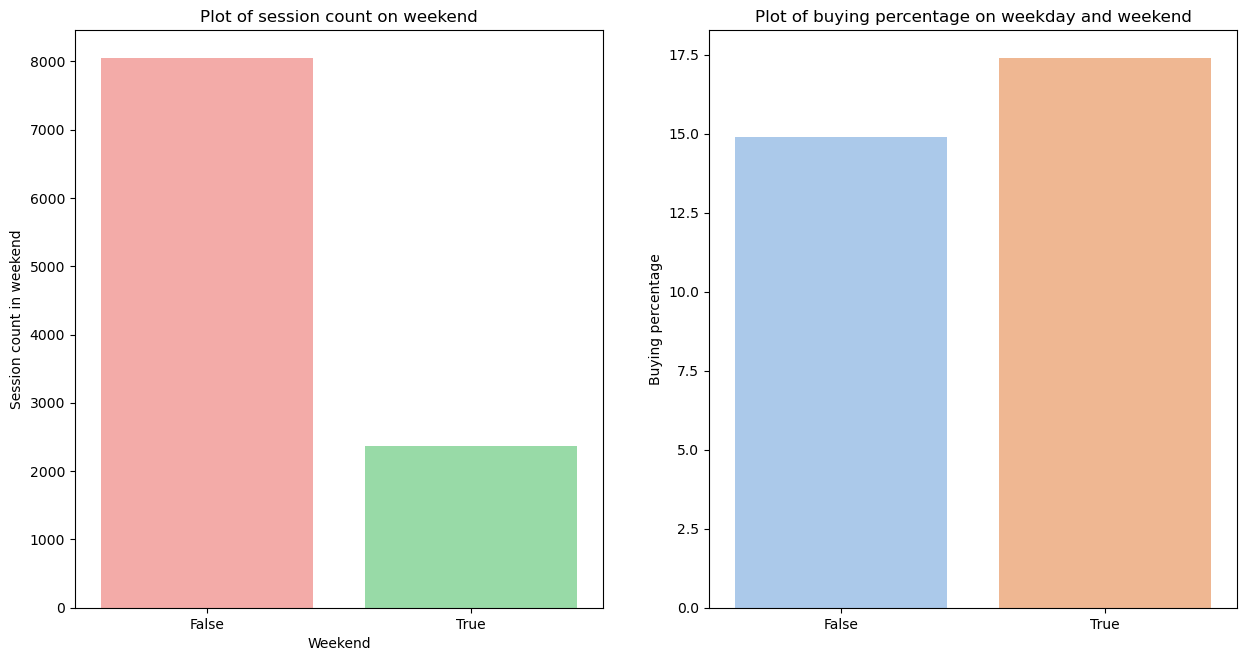

In [19]:
# Importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define a color palette for the plots
colors = sns.color_palette('pastel')[2:4][::-1]  # Use pastel colors and reverse the order for distinction

# Step 2: Aggregate session counts by 'Weekend' status and revenue outcome ('NonBuyers' and 'Buyers')
# Group by 'Weekend' and count the occurrences of revenue outcomes (0 = NonBuyer, 1 = Buyer)
weekend_counts = shopping_dataset.groupby('Weekend')['Revenue'].value_counts().unstack().fillna(0)

# Rename columns for clarity
weekend_counts.columns = ['NonBuyers', 'Buyers']

# Step 3: Create a figure with two subplots
plt.figure(figsize=(15, 7.5))  # Set the figure size

# Subplot 1: Session count on weekends
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
ax1 = sns.barplot(
    x=weekend_counts.index,  # x-axis: Weekend status
    y=weekend_counts['NonBuyers'],  # y-axis: Count of non-buyers
    palette=colors  # Use defined color palette
)
plt.ylabel("Session count in weekend")  # Label for the y-axis
ax1.set_title("Plot of session count on weekend")  # Title for the subplot

# Step 4: Calculate buying percentage for weekday and weekend
# Add a new column for the percentage of buyers in each weekend group
shopping_dataset['BuyersPct'] = shopping_dataset.groupby('Weekend')['Revenue'].transform(lambda x: x.mean() * 100)

# Subplot 2: Buying percentage on weekday and weekend
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
ax2 = sns.barplot(
    x=shopping_dataset['Weekend'].unique(),  # x-axis: Unique weekend statuses (0 or 1)
    y=shopping_dataset.groupby('Weekend')['BuyersPct'].first(),  # y-axis: Percentage of buyers
    palette='pastel'  # Use pastel colors
)
plt.ylabel("Buying percentage")  # Label for the y-axis
ax2.set_title("Plot of buying percentage on weekday and weekend")  # Title for the subplot

# Display the plots
plt.show()

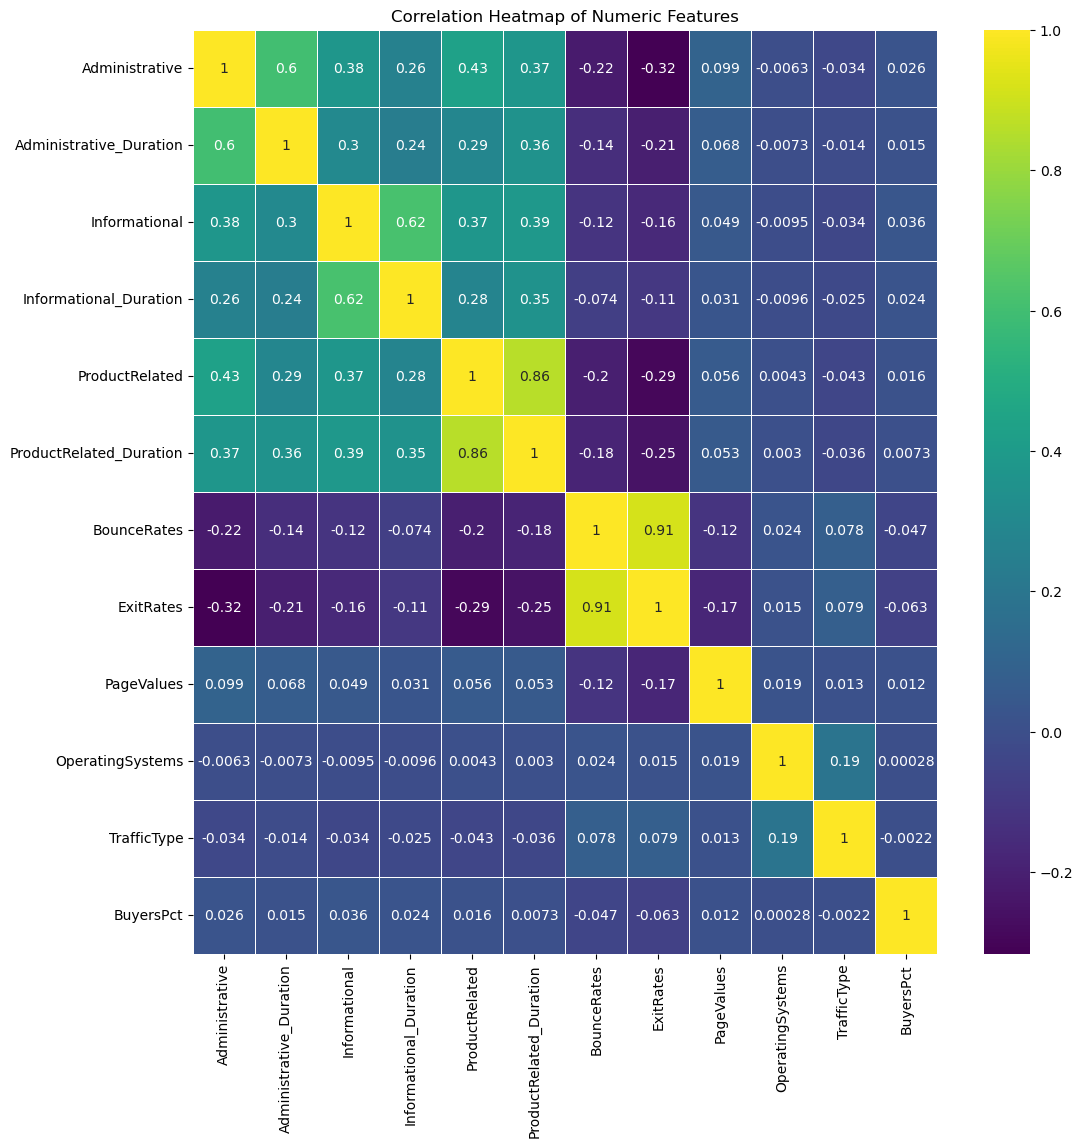

In [20]:
# Step 1: Filter the dataset to include only numeric columns
# `select_dtypes(include=['number'])` filters the dataset to retain only numeric columns
# This ensures the correlation matrix calculation applies only to numerical features
numeric_shopping_dataset = shopping_dataset.select_dtypes(include=['number'])

# Step 2: Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 12))  # Set the figure size to make the heatmap large and readable
sns.heatmap(
    numeric_shopping_dataset.corr(),  # Compute the correlation matrix for numeric columns
    annot=True,  # Display the correlation values within the heatmap cells
    cmap='viridis',  # Use the 'viridis' colormap for the heatmap
    linewidths=0.5  # Add grid lines between cells for better readability
)
plt.title('Correlation Heatmap of Numeric Features')  # Add a title for context
plt.show()  # Display the heatmap

In [21]:
# Step 1: Separate features (X) and target variable (y)
# `X` will contain all the columns except the target column ('Revenue')
# `drop(['Revenue'], axis=1)` removes the 'Revenue' column from the dataset along the column axis
X = shopping_dataset.drop(['Revenue'], axis=1)

# `y` will contain only the target column ('Revenue'), which we want to predict
y = shopping_dataset['Revenue']

In [22]:
#  Initialize the LabelEncoder
# LabelEncoder is used to convert categorical values into numeric values
label_encoder = LabelEncoder()

# Identify categorical columns in the feature set (X)
# `select_dtypes(include=['object', 'bool'])` filters columns with data types 'object' (string) or 'bool' (boolean)
categorical_columns = X.select_dtypes(include=['object', 'bool']).columns

# Apply LabelEncoder to each categorical column
# Iterate through each column identified as categorical
for col in categorical_columns:
    # Use LabelEncoder to transform categorical values into numeric labels
    X[col] = label_encoder.fit_transform(X[col])

In [23]:
# Initialize the StandardScaler
# StandardScaler standardizes features by removing the mean and scaling to unit variance
# This ensures all features are on the same scale, which is important for many machine learning algorithms
scaler = StandardScaler()

# Fit and transform the feature set (X)
# `fit_transform`:
# - `fit`: Learns the mean and standard deviation of each feature in X
# - `transform`: Applies the standardization (z-score scaling) to the dataset
X_scaled = scaler.fit_transform(X)

In [24]:
# Step: Splitting the dataset into training and testing sets
# `train_test_split` is used to divide the dataset into:
# - Training data (X_train, y_train): Used for training the machine learning model
# - Testing data (X_test, y_test): Used to evaluate the model's performance on unseen data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,  # Scaled features as input
    y,         # Target variable
    test_size=0.3,  # Proportion of the dataset to include in the test set (30% in this case)
    random_state=42  # Ensures reproducibility of the split
)

In [25]:
#Initialize the RandomForestClassifier model
# `n_estimators=100`: Specifies the number of decision trees in the forest (100 trees in this case)
# `random_state=42`: Ensures reproducibility by setting a seed for the random number generator
model = RandomForestClassifier(n_estimators=100, random_state=42)

#  Train the model on the training dataset
# `fit(X_train, y_train)`:
# - Fits the RandomForestClassifier model to the training features (X_train) and labels (y_train)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Random Forest Classifier:
Accuracy: 0.8959178156258448
Confusion Matrix:
 [[2996  128]
 [ 257  318]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.96      0.94      3124
        True       0.71      0.55      0.62       575

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



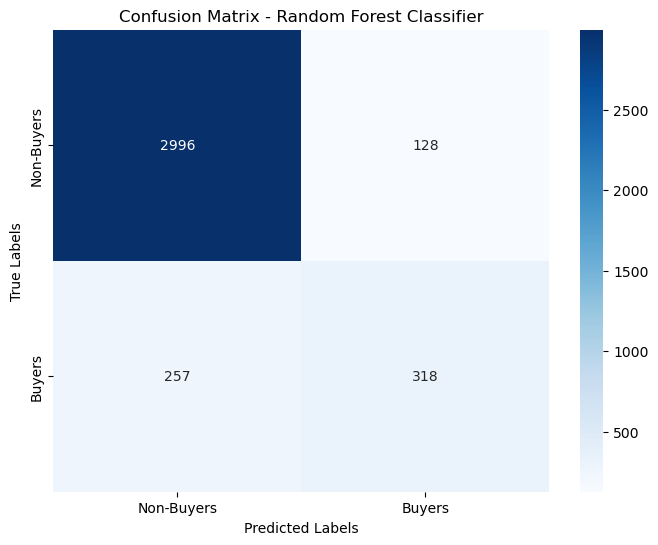

In [26]:
# Step 1: Initialize the RandomForestClassifier
# `n_estimators=100`: Number of decision trees in the forest
# `random_state=42`: Ensures reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train the model on the training dataset
# `fit(X_train, y_train)`: Fits the RandomForestClassifier model to the training data
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test dataset
# `predict(X_test)`: Predicts the target variable for the test features
y_pred_rf = rf_model.predict(X_test)

# Step 4: Evaluate the model
# Printing accuracy, confusion matrix, and classification report for the Random Forest model
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))  # Calculate and print the accuracy score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))  # Print the confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_rf))  # Print a detailed classification report

# Step 5: Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),  # Generate the confusion matrix for the heatmap
    annot=True,  # Annotate each cell with the corresponding count
    fmt="d",  # Format the annotations as integers
    cmap="Blues",  # Use the 'Blues' colormap for the heatmap
    xticklabels=['Non-Buyers', 'Buyers'],  # Set custom x-axis labels
    yticklabels=['Non-Buyers', 'Buyers']   # Set custom y-axis labels
)
plt.title("Confusion Matrix - Random Forest Classifier")  # Add a title
plt.xlabel("Predicted Labels")  # Label for x-axis
plt.ylabel("True Labels")  # Label for y-axis
plt.show()  # Display the heatmap


Logistic Regression:
Accuracy: 0.8813192754798594
Confusion Matrix:
 [[3056   68]
 [ 371  204]]
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.98      0.93      3124
        True       0.75      0.35      0.48       575

    accuracy                           0.88      3699
   macro avg       0.82      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699



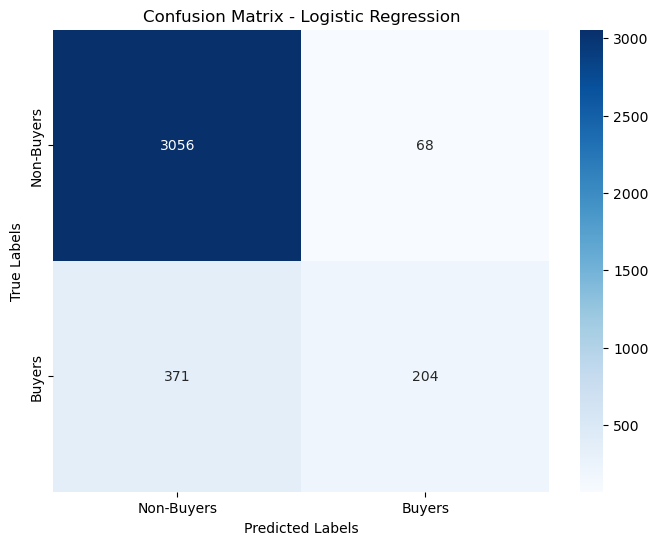

In [27]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize and Train the Logistic Regression Model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred_lr = lr_model.predict(X_test)

# Step 3: Evaluate the Model
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))  # Calculate and print the accuracy score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))  # Print the confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_lr))  # Print a detailed classification report

# Step 4: Visualize the Confusion Matrix
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, 
    annot=True,  # Display numbers in each cell
    fmt="d",  # Format the annotations as integers
    cmap="Blues",  # Use the 'Blues' colormap
    xticklabels=['Non-Buyers', 'Buyers'],  # Custom x-axis labels
    yticklabels=['Non-Buyers', 'Buyers']   # Custom y-axis labels
)
plt.title("Confusion Matrix - Logistic Regression")  # Add a title
plt.xlabel("Predicted Labels")  # Label for x-axis
plt.ylabel("True Labels")  # Label for y-axis
plt.show()


Gradient Boosting Classifier:
Accuracy: 0.8959178156258448
Confusion Matrix:
 [[2977  147]
 [ 238  337]]
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.95      0.94      3124
        True       0.70      0.59      0.64       575

    accuracy                           0.90      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699



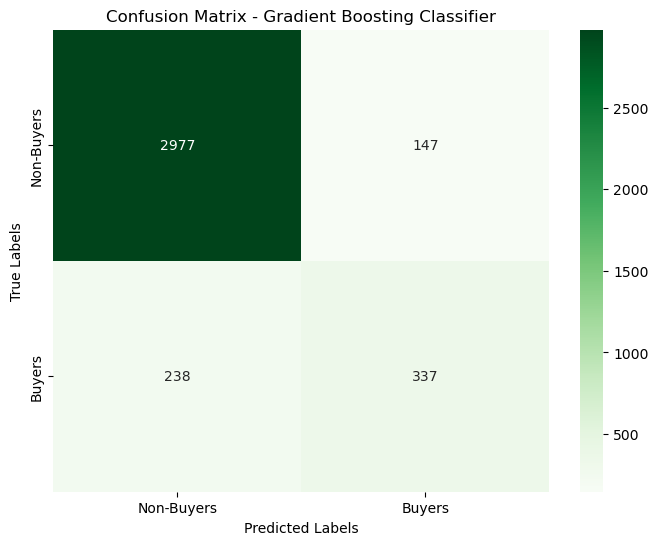

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize the Gradient Boosting Classifier
# `random_state=42`: Ensures reproducibility of results
gb_model = GradientBoostingClassifier(random_state=42)

# Step 2: Train the Gradient Boosting model on the training dataset
# `fit(X_train, y_train)`: Fits the model to the training data
gb_model.fit(X_train, y_train)

# Step 3: Make predictions on the test dataset
# `predict(X_test)`: Predicts the target variable for the test features
y_pred_gb = gb_model.predict(X_test)

# Step 4: Evaluate the Gradient Boosting Classifier
# Printing accuracy, confusion matrix, and classification report
print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))  # Calculate and print the accuracy score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))  # Print the confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_gb))  # Print a detailed classification report

# Step 5: Visualize the Confusion Matrix
# Generate the confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(
    conf_matrix_gb, 
    annot=True,  # Annotate each cell with the corresponding count
    fmt="d",  # Format the annotations as integers
    cmap="Greens",  # Use the 'Greens' colormap for the heatmap
    xticklabels=['Non-Buyers', 'Buyers'],  # Set custom x-axis labels
    yticklabels=['Non-Buyers', 'Buyers']   # Set custom y-axis labels
)
plt.title("Confusion Matrix - Gradient Boosting Classifier")  # Add a title for the heatmap
plt.xlabel("Predicted Labels")  # Label the x-axis
plt.ylabel("True Labels")  # Label the y-axis
plt.show()


Support Vector Machine (SVM):
Accuracy: 0.8902406055690727
Confusion Matrix:
 [[3033   91]
 [ 315  260]]
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.97      0.94      3124
        True       0.74      0.45      0.56       575

    accuracy                           0.89      3699
   macro avg       0.82      0.71      0.75      3699
weighted avg       0.88      0.89      0.88      3699



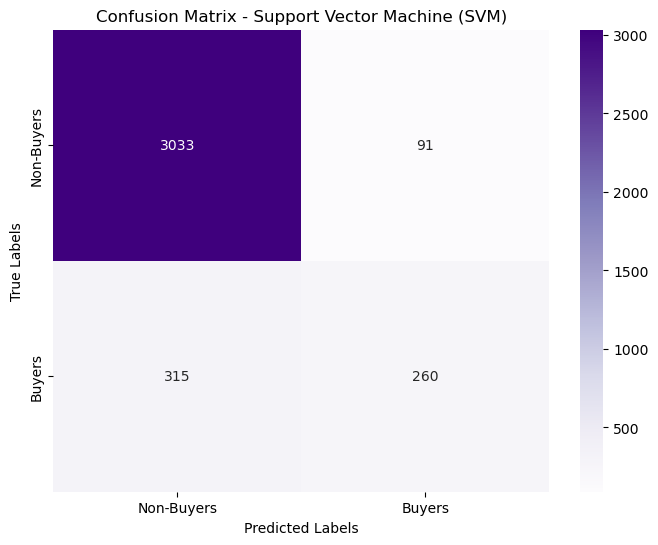

In [29]:
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize the SVM Model
# `kernel='rbf'`: Specifies the Radial Basis Function kernel, which is popular for non-linear classification
# `random_state=42`: Ensures reproducibility
# `probability=True`: Enables probability estimates (useful for downstream tasks like ROC curves)
svm_model = SVC(kernel='rbf', random_state=42, probability=True)

# Step 2: Train the SVM model on the training dataset
# `fit(X_train, y_train)`: Fits the model to the training data
svm_model.fit(X_train, y_train)

# Step 3: Make predictions on the test dataset
# `predict(X_test)`: Predicts the target variable for the test features
y_pred_svm = svm_model.predict(X_test)

# Step 4: Evaluate the SVM Model
# Printing accuracy, confusion matrix, and classification report
print("\nSupport Vector Machine (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))  # Calculate and print the accuracy score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))  # Print the confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_svm))  # Print a detailed classification report

# Step 5: Visualize the Confusion Matrix
# Generate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(
    conf_matrix_svm, 
    annot=True,  # Annotate each cell with the corresponding count
    fmt="d",  # Format the annotations as integers
    cmap="Purples",  # Use the 'Purples' colormap for the heatmap
    xticklabels=['Non-Buyers', 'Buyers'],  # Set custom x-axis labels
    yticklabels=['Non-Buyers', 'Buyers']   # Set custom y-axis labels
)
plt.title("Confusion Matrix - Support Vector Machine (SVM)")  # Add a title for the heatmap
plt.xlabel("Predicted Labels")  # Label the x-axis
plt.ylabel("True Labels")  # Label the y-axis
plt.show()

In [30]:
# Step 1: Create a dictionary to store model names and their respective accuracy scores
# Keys: Names of the models used
# Values: Accuracy scores calculated using `accuracy_score(y_test, y_pred_<model>)`
model_scores = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),  # Accuracy of Random Forest model
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),  # Accuracy of Logistic Regression model
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),  # Accuracy of Gradient Boosting model
    "SVM": accuracy_score(y_test, y_pred_svm)  # Accuracy of Support Vector Machine model
}

# Step 2: Print the comparison of model performances
# Iterate through the dictionary and print each model's name and its accuracy score
print("\nModel Performance Comparison:")
for model, score in model_scores.items():
    print(f"{model}: {score:.4f}")  # Print accuracy scores rounded to 4 decimal places


Model Performance Comparison:
Random Forest: 0.8959
Logistic Regression: 0.8813
Gradient Boosting: 0.8959
SVM: 0.8902
